In [1]:
import numpy as np
import pandas as pd


In [2]:
#Membaca data
ekonom = pd.read_csv("2020.csv")
ekonom.head()

,PROVINSI,LajuPE,PersentaseTK,IPM,PersentasePenduduk,PersentaseEkspor
0,ACEH,-0.37,38.12,71.99,1.998528,1.400467
1,SUMATERA UTARA,-1.07,40.38,71.77,5.488952,1.499729
2,SUMATERA BARAT,-1.60,33.72,72.38,2.056984,0.737151
3,RIAU,-1.12,44.03,72.71,2.578306,4.385003
4,JAMBI,-0.46,37.26,71.29,1.336853,0.942264


In [3]:
#informasi data
ekonom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROVINSI            34 non-null     object 
 1   LajuPE              34 non-null     float64
 2   PersentaseTK        34 non-null     float64
 3   IPM                 34 non-null     float64
 4   PersentasePenduduk  34 non-null     float64
 5   PersentaseEkspor    34 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


#Data Preprocessing


In [4]:
#Menampilkan semua nama kolom
ekonom.columns

Index(['PROVINSI', 'LajuPE', 'PersentaseTK', 'IPM', 'PersentasePenduduk',
       'PersentaseEkspor'],
      dtype='object')

In [5]:
#Mengecek NA/NULL
ekonom.isnull().any()

PROVINSI              False
LajuPE                False
PersentaseTK          False
IPM                   False
PersentasePenduduk    False
PersentaseEkspor      False
dtype: bool

In [6]:
#Ukuran data
ekonom.shape

(34, 6)

In [7]:
#Deskripsi(stat des) data homefix untuk variabel numerik
ekonom.describe()

,LajuPE,PersentaseTK,IPM,PersentasePenduduk,PersentaseEkspor
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,-1.252059,38.991176,71.080882,2.941176,2.941176
std,2.371115,9.620444,3.901881,4.174161,7.623480
min,-9.310000,20.080000,60.440000,0.262756,0.011610
25%,-2.382500,33.757500,69.505000,0.875490,0.202781
50%,-1.115000,37.570000,71.425000,1.518490,0.886397
75%,-0.642500,43.850000,72.307500,3.018842,2.406176
max,4.920000,64.590000,80.770000,18.384486,41.620883


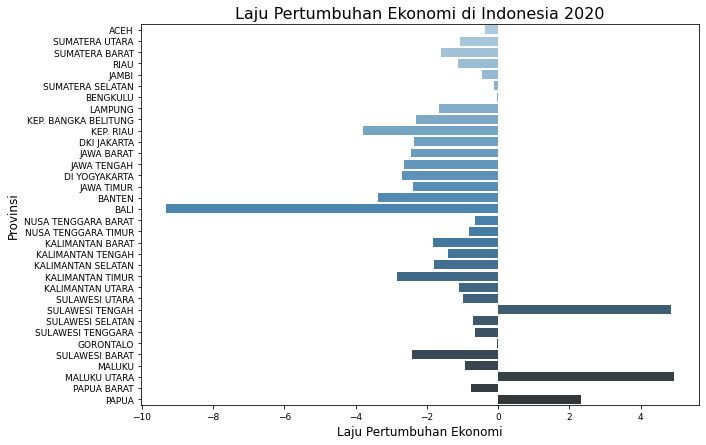

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#set ukuran plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

a = sns.barplot(x = "LajuPE", y = "PROVINSI", data = ekonom, palette = "Blues_d")

#set label
a.set_xlabel("Laju Pertumbuhan Ekonomi", fontsize = 12)
a.set_ylabel("Provinsi", fontsize = 12)
a.axes.set_title("Laju Pertumbuhan Ekonomi di Indonesia 2020", fontsize=16)
a.tick_params(labelsize = 9)

#tampilkan plot
plt.show()

In [9]:
import plotly.graph_objects as go
import plotly.express as px
fig1 = px.bar(ekonom[1:34], y='LajuPE', x='PROVINSI', text='LajuPE', color='PROVINSI')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=0)
fig1

# EDA (Exploratory Data Analysis)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

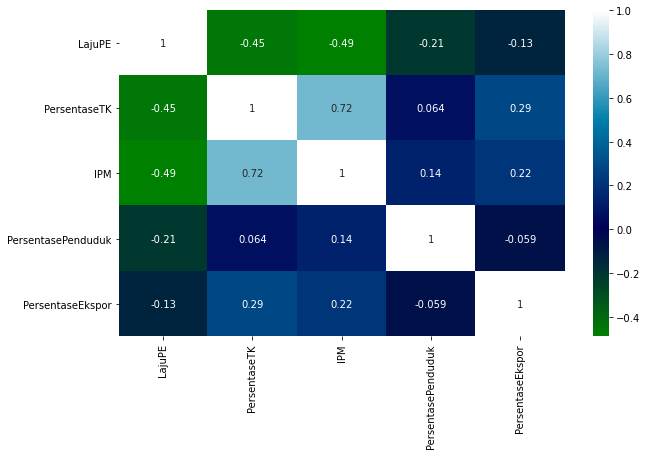

In [11]:
#Heatmap untuk korelasi
plt.figure(figsize=(10,6))
sns.heatmap(ekonom.corr(), annot=True, cmap="ocean")

#Korelasi
home.corr().LajuPE.sort_values(ascending=False)

In [12]:
#Korelasi
ekonom.corr().LajuPE.sort_values(ascending=False)

LajuPE                1.000000
PersentaseEkspor     -0.132964
PersentasePenduduk   -0.206465
PersentaseTK         -0.450676
IPM                  -0.489933
Name: LajuPE, dtype: float64

In [13]:
#buang Persentase Penuduk dan Ekspor
xx = ekonom.drop('PersentaseEkspor',axis=1)
ekonomi = xx.drop('PersentasePenduduk',axis=1)
ekonomi.head()

,PROVINSI,LajuPE,PersentaseTK,IPM
0,ACEH,-0.37,38.12,71.99
1,SUMATERA UTARA,-1.07,40.38,71.77
2,SUMATERA BARAT,-1.60,33.72,72.38
3,RIAU,-1.12,44.03,72.71
4,JAMBI,-0.46,37.26,71.29


In [14]:
#menentukan data yg di cluster
x=ekonomi.iloc[:,1:4]
x.head()

,LajuPE,PersentaseTK,IPM
0,-0.37,38.12,71.99
1,-1.07,40.38,71.77
2,-1.60,33.72,72.38
3,-1.12,44.03,72.71
4,-0.46,37.26,71.29


In [15]:
#mengubah data jadi array
x_array=np.array(x)
x_array

array([[-3.700e-01,  3.812e+01,  7.199e+01],
       [-1.070e+00,  4.038e+01,  7.177e+01],
       [-1.600e+00,  3.372e+01,  7.238e+01],
       [-1.120e+00,  4.403e+01,  7.271e+01],
       [-4.600e-01,  3.726e+01,  7.129e+01],
       [-1.100e-01,  3.474e+01,  7.001e+01],
       [-2.000e-02,  3.077e+01,  7.140e+01],
       [-1.670e+00,  2.774e+01,  6.969e+01],
       [-2.300e+00,  4.707e+01,  7.147e+01],
       [-3.800e+00,  6.459e+01,  7.559e+01],
       [-2.360e+00,  6.178e+01,  8.077e+01],
       [-2.440e+00,  4.441e+01,  7.209e+01],
       [-2.650e+00,  3.725e+01,  7.187e+01],
       [-2.690e+00,  4.259e+01,  7.997e+01],
       [-2.390e+00,  3.636e+01,  7.171e+01],
       [-3.380e+00,  5.083e+01,  7.245e+01],
       [-9.310e+00,  4.331e+01,  7.550e+01],
       [-6.400e-01,  2.653e+01,  6.825e+01],
       [-8.300e-01,  2.390e+01,  6.519e+01],
       [-1.820e+00,  3.699e+01,  6.766e+01],
       [-1.400e+00,  4.420e+01,  7.105e+01],
       [-1.810e+00,  3.918e+01,  7.091e+01],
       [-2

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#Scaling data
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_array)
x_scaled

array([[0.62825018, 0.40530218, 0.56812592],
       [0.57905833, 0.45607729, 0.55730448],
       [0.54181307, 0.30644799, 0.58730939],
       [0.57554462, 0.53808133, 0.60354156],
       [0.62192551, 0.38598068, 0.53369405],
       [0.64652143, 0.32936419, 0.47073291],
       [0.6528461 , 0.24017075, 0.53910477],
       [0.53689389, 0.17209616, 0.45499262],
       [0.49262122, 0.60638059, 0.54254796],
       [0.38721012, 1.        , 0.74520413],
       [0.48840478, 0.93686812, 1.        ],
       [0.48278285, 0.54661874, 0.57304476],
       [0.4680253 , 0.38575601, 0.56222332],
       [0.46521434, 0.50572905, 0.96064929],
       [0.48629656, 0.3657605 , 0.55435317],
       [0.41672523, 0.69085599, 0.59075258],
       [0.        , 0.52190519, 0.74077718],
       [0.60927618, 0.14491126, 0.38416134],
       [0.5959241 , 0.08582341, 0.23364486],
       [0.52635278, 0.37991463, 0.35514019],
       [0.55586788, 0.5419007 , 0.52188883],
       [0.52705552, 0.42911705, 0.51500246],
       [0.

In [17]:
#function returns WSS score for k values from 1 to kmax

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [18]:
wss=calculate_WSS(x_scaled, 15)

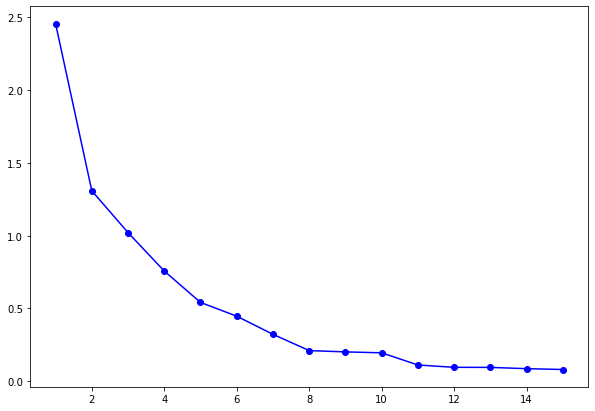

In [19]:
#plot elbow
xx=np.arange(1,16,1)
plt.figure(figsize=[10,7])
plt.plot(xx,wss, "b-o")
plt.show()

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]

def silh(X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=300, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.37793491427769305
For n_clusters = 3 The average silhouette_score is : 0.38052279464737115
For n_clusters = 4 The average silhouette_score is : 0.3247837866984325


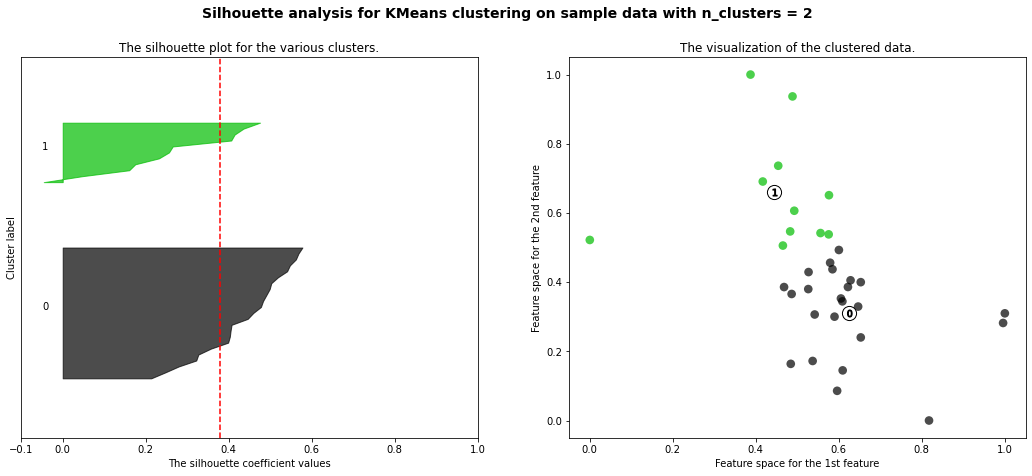

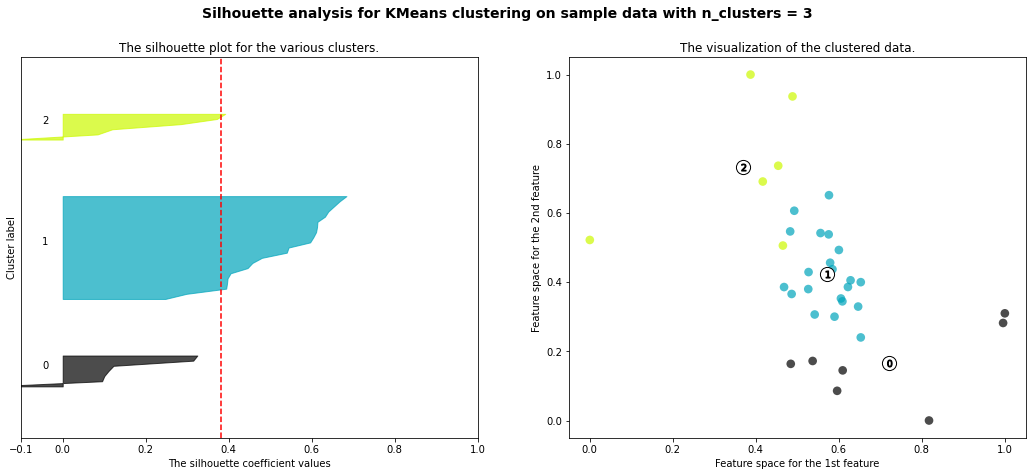

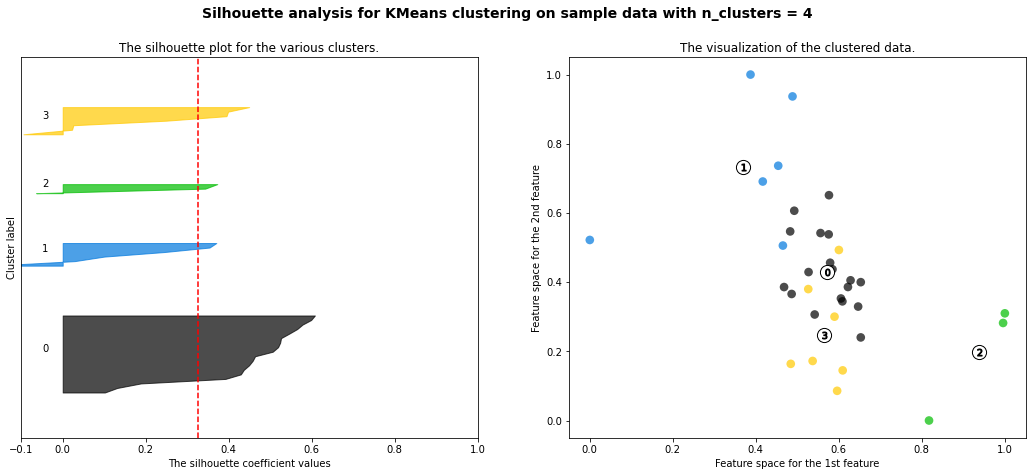

In [21]:
silh(x_scaled)

In [22]:
#menentukan model cluster
kmeans = KMeans(n_clusters = 3, random_state=123)

In [23]:
#menginput data pada model
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [24]:
# label cluster
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [25]:
#pusat cluster
kmeans.cluster_centers_

array([[0.56995464, 0.41216478, 0.51093324],
       [0.75040993, 0.16438254, 0.29012953],
       [0.36858749, 0.73197034, 0.80242663]])

In [26]:
#menambahkan label pada data frame
ekonomi['cluster'] = kmeans.labels_
ekonomi.head

<bound method NDFrame.head of                 PROVINSI  LajuPE  PersentaseTK    IPM  cluster
0                   ACEH   -0.37         38.12  71.99        0
1         SUMATERA UTARA   -1.07         40.38  71.77        0
2         SUMATERA BARAT   -1.60         33.72  72.38        0
3                   RIAU   -1.12         44.03  72.71        0
4                  JAMBI   -0.46         37.26  71.29        0
5       SUMATERA SELATAN   -0.11         34.74  70.01        0
6               BENGKULU   -0.02         30.77  71.40        0
7                LAMPUNG   -1.67         27.74  69.69        0
8   KEP. BANGKA BELITUNG   -2.30         47.07  71.47        0
9              KEP. RIAU   -3.80         64.59  75.59        2
10           DKI JAKARTA   -2.36         61.78  80.77        2
11            JAWA BARAT   -2.44         44.41  72.09        0
12           JAWA TENGAH   -2.65         37.25  71.87        0
13         DI YOGYAKARTA   -2.69         42.59  79.97        2
14            JAWA TIMUR 

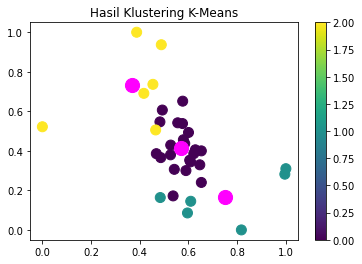

In [27]:
cluster = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = cluster, marker = "o", alpha = 1 )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="magenta", s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

In [28]:
grup=ekonomi.groupby("cluster")

In [29]:
profil = pd.DataFrame(grup.mean())
profil

,LajuPE,PersentaseTK,IPM
cluster,,,
0,-1.199545,38.425455,70.827273
1,1.368333,27.396667,66.338333
2,-4.065000,52.660000,76.753333


In [30]:
profil["cluster"]=profil.index

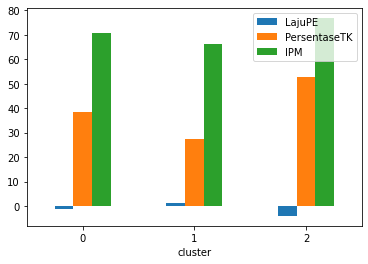

In [31]:
profil.plot(x="cluster", y=["LajuPE", "PersentaseTK","IPM"], kind="bar")
plt.xticks(rotation=0)
plt.show()

In [32]:
# Anggota cluster 0
ekonomi[ekonomi.cluster == 0]

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
0,ACEH,-0.37,38.12,71.99,0
1,SUMATERA UTARA,-1.07,40.38,71.77,0
2,SUMATERA BARAT,-1.60,33.72,72.38,0
3,RIAU,-1.12,44.03,72.71,0
4,JAMBI,-0.46,37.26,71.29,0
5,SUMATERA SELATAN,-0.11,34.74,70.01,0
6,BENGKULU,-0.02,30.77,71.40,0
7,LAMPUNG,-1.67,27.74,69.69,0
8,KEP. BANGKA BELITUNG,-2.30,47.07,71.47,0
11,JAWA BARAT,-2.44,44.41,72.09,0


In [33]:
# Anggota cluster 1
ekonomi[ekonomi.cluster == 1]

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
17,NUSA TENGGARA BARAT,-0.64,26.53,68.25,1
18,NUSA TENGGARA TIMUR,-0.83,23.90,65.19,1
25,SULAWESI TENGAH,4.86,32.63,69.55,1
29,SULAWESI BARAT,-2.42,27.37,66.11,1
31,MALUKU UTARA,4.92,33.87,68.49,1
33,PAPUA,2.32,20.08,60.44,1


In [34]:
# Anggota cluster 2
ekonomi[ekonomi.cluster == 2]

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
9,KEP. RIAU,-3.80,64.59,75.59,2
10,DKI JAKARTA,-2.36,61.78,80.77,2
13,DI YOGYAKARTA,-2.69,42.59,79.97,2
15,BANTEN,-3.38,50.83,72.45,2
16,BALI,-9.31,43.31,75.50,2
22,KALIMANTAN TIMUR,-2.85,52.86,76.24,2


In [35]:
ekonomi['cluster'] = kmeans.labels_
ekonomi

,PROVINSI,LajuPE,PersentaseTK,IPM,cluster
0,ACEH,-0.37,38.12,71.99,0
1,SUMATERA UTARA,-1.07,40.38,71.77,0
2,SUMATERA BARAT,-1.60,33.72,72.38,0
3,RIAU,-1.12,44.03,72.71,0
4,JAMBI,-0.46,37.26,71.29,0
5,SUMATERA SELATAN,-0.11,34.74,70.01,0
6,BENGKULU,-0.02,30.77,71.40,0
7,LAMPUNG,-1.67,27.74,69.69,0
8,KEP. BANGKA BELITUNG,-2.30,47.07,71.47,0
9,KEP. RIAU,-3.80,64.59,75.59,2


In [36]:
ekonomi.to_csv("2020hasil.csv")

In [1]:
import pandas as pd

In [3]:
application = pd.read_csv('C:/Users/ASUS/Downloads/application_record.csv')
credit = pd.read_csv('C:/Users/ASUS/Downloads/credit_record.csv')

In [9]:
application.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
186636,5861133,F,N,Y,0,166500.0,Working,Secondary / secondary special,Married,Office apartment,-18986,-2246,1,0,0,0,Medicine staff,2.0
141471,5678230,F,N,Y,0,96750.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23154,365243,1,0,0,0,NaN,2.0
384110,6618751,F,Y,N,0,166500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23013,365243,1,0,1,0,NaN,2.0
108743,5465001,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23664,-2254,1,0,0,0,NaN,2.0
436997,6124123,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22822,365243,1,0,0,0,NaN,2.0


In [11]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       